# Examples for Bounded Innovation Propagation (BIP) MM ARMA parameter estimation

Import libraries and fix seed of rng for reproducibility

In [1]:
import numpy as np
import scipy.signal as sps
import robustsp as rsp
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
# Fix random number generator for reproducibility
np.random.seed(1)

ar1 = sio.loadmat('s_demo_ar1')['s_demo_ar1'].flatten() # -.8
ma2 = sio.loadmat('s_demo_ma2')['s_demo_ma2'].flatten() # -.8 , .2
arma11 = sio.loadmat('s_demo_arma11')['s_demo_arma11'].flatten() # -.7, .5

meth = 'SLSQP'

## Example 1: AR(1) with 30 percent isolated outliers

In [2]:
# Generate AR(1) observations
N = 300
a = np.random.randn(N)
x = sps.lfilter([1],[1,-.8],a)
p = 1
q = 0

### Generate isolated Outliers

In [3]:
cont_prob = 0.3 # outlier contamination probability
outlier_ind =  np.where(np.sign(np.random.rand(N)-cont_prob)<0)# outlier index
outlier = 100*np.random.randn(N) # contaminating process
v = np.zeros(N) # additive outlier signal
v[outlier_ind] = outlier[outlier_ind]
v[0] = 0 # first sample should not be an outlier

x_ao = x+v # 30% of isolated additive outliers

### BIP MM Estimation

In [4]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

Example: AR(1) with ar_coeff = -0.8
30% of isolated additive outliers
estimaed coefficients: -0.779
[-0.81012022] []


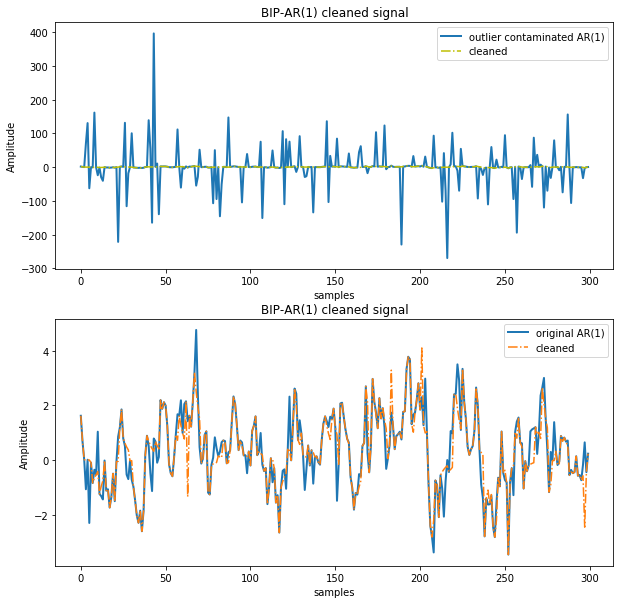

In [5]:
print('Example: AR(1) with ar_coeff = -0.8')
print('30% of isolated additive outliers')
print('estimaed coefficients: %.3f' % result['ar_coeffs'])
result2 = rsp.arma_est_bip_s(ar1,1,0)
print(result2['ar_coeffs'],result2['ma_coeffs'])

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],'-.',c='y',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original AR(1)')
plt.plot(result['cleaned_signal'],'-.',label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-AR(1) cleaned signal')
plt.legend()
plt.show()

# Example 2: ARMA(1,1) with 10% patchy outliers

## Generate ARMA(1,1) observations

In [6]:
N = 1000
a = np.random.randn(N)
x = sps.lfilter([1, 0.2],[1, -.8],a)
p = 1
q = 1

## Generate a patch of outliers of length 101 samples

In [7]:
v = 1000*np.random.randn(101)

## 10% of patch additive outliers

In [8]:
x_ao = np.array(x)
x_ao[99:200] += v

### BIP-MM estimation

In [9]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

print('''Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' \n
10 percent patchy additive outliers \n
estimated coefficients: \n
ar_coeff_est = %.3f \n
ma_coeff_est = %.3f ''' %(result['ar_coeffs'],result['ma_coeffs']))

result2 = rsp.arma_est_bip_s(arma11,1,1) # arma11 := x_ao from matlab
print(result2['ar_coeffs'],result2['ma_coeffs'])

Example 2: ARMA(1,1) with ar_coeff = -0.8, ma_coeff 0.2' 

10 percent patchy additive outliers 

estimated coefficients: 

ar_coeff_est = -0.835 

ma_coeff_est = 0.058 
[-0.73325988] [0.23653919]


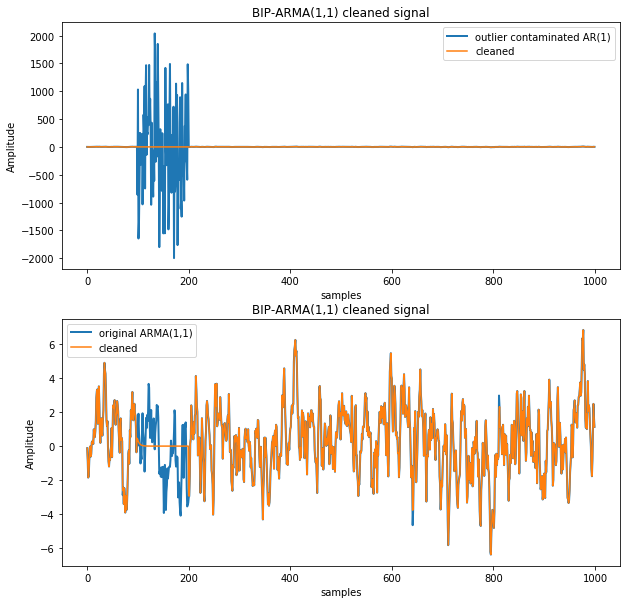

In [10]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original ARMA(1,1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-ARMA(1,1) cleaned signal')
plt.legend()
plt.show()

# Example 3: MA(2) with 20 % isolated Outliers

## Generate MA(2) observations

In [11]:
N = 500
a = np.random.randn(N)
x = sps.lfilter([1,-.7,.5],[1],a)
p=0
q=2

## Generate isolated Outliers

In [12]:
cont_prob = 0.2
outlier_ind = np.where(np.sign(np.random.rand(N)-(cont_prob))<0)
outlier = 100*np.random.randn(N)
v = np.zeros(N)
v[outlier_ind] = outlier[outlier_ind]
v[:2] = 0

## 20 % of isolated additive Outliers

In [13]:
x_ao = x+v

## BIP MM estimation

In [14]:
result = rsp.arma_est_bip_s(x_ao,p,q,meth=meth)

In [15]:
print('''Example 3: MA(2) ma_coeff [-0.7 0.5]' \n
20 % of isolated additive Outliers \n
estimated coefficients: \n
ma_coeff_est = ''',result['ma_coeffs'])

result2 = rsp.arma_est_bip_s(ma2,0,2)

print(result2['ar_coeffs'],result2['ma_coeffs'])

Example 3: MA(2) ma_coeff [-0.7 0.5]' 

20 % of isolated additive Outliers 

estimated coefficients: 

ma_coeff_est =  [ 0.64421346 -0.35589978]
[] [ 0.64821396 -0.42687001]


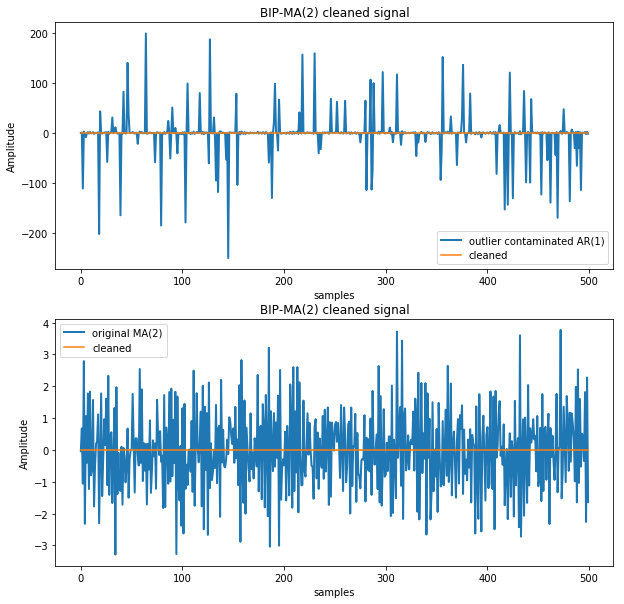

In [16]:
plt.subplot(2,1,1)
plt.plot(x_ao,'-',lw=2,label='outlier contaminated AR(1)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()

plt.subplot(2,1,2)
plt.plot(x,lw=2,label='original MA(2)')
plt.plot(result['cleaned_signal'],label='cleaned')

plt.xlabel('samples')
plt.ylabel('Amplitude')
plt.title('BIP-MA(2) cleaned signal')
plt.legend()
plt.show()